In [1]:
# Import standard libraries
import numpy as np
from time import time

# Import local modules
from forestfire import ForestFire
from analysis import *

# Create output directory if it does not exist
from pathlib import Path
Path('animations').mkdir(parents=True, exist_ok=True)
Path('plots').mkdir(parents=True, exist_ok=True)

Time elapsed: 40.81 seconds


TypeError: cannot unpack non-iterable NoneType object

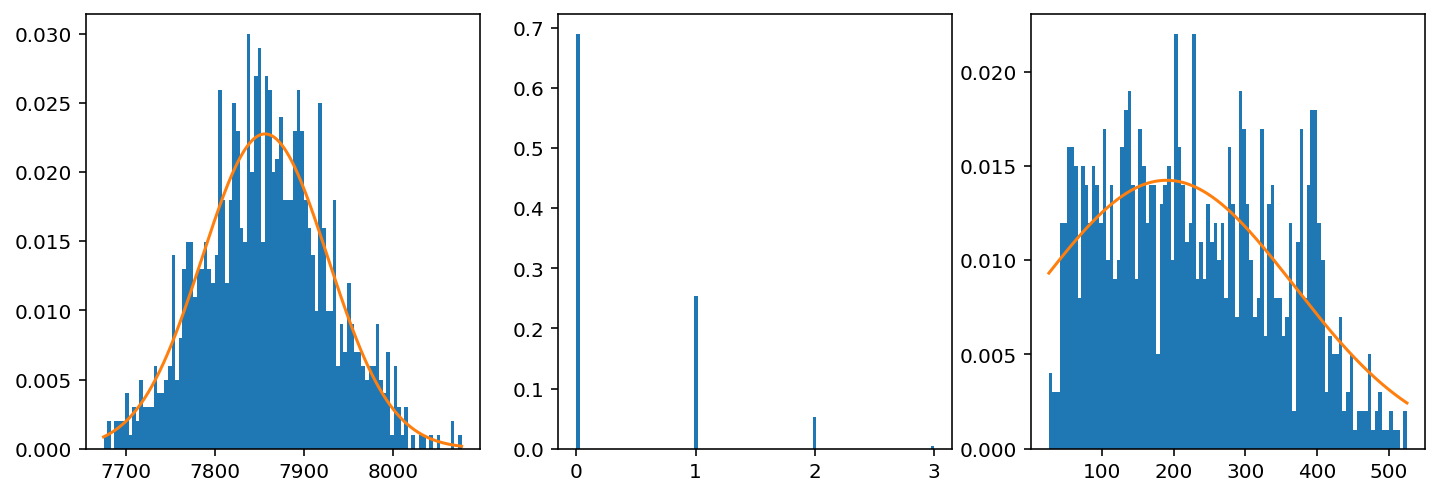

In [5]:
L = 200
forest1 = ForestFire([L,L], 0, 0.5, spark=True)
l = 0.01
forest2 = ForestFire([L,L], l, l/1000, spark=False)
forest3 = ForestFire([L,L], l/1000, l, spark=False)
t = [10000, 10000, 10000]
N = 1000
popt1, popt3 = plot_firesizepd_multi(forest1, forest2, forest3, t, N)
print(popt1, popt3)